# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [74]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import datetime

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [42]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 590


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [43]:
url = "http://api.openweathermap.org/data/2.5/weather?"
city_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=imperial"
city_url

'http://api.openweathermap.org/data/2.5/weather?appid=81e184ad56e7e62e66a3e02d0a8dc0d4&q=cape town&units=imperial'

In [44]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1


# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities

   

   

    try:
        # Parse the JSON and retrieve data
        response = requests.get(city_url).json()
#         print(response)

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
       
      
        city_lat = response['coord']['lat']
        city_lon = response['coord']['lon']
        city_max_temp = response['main']['temp_max']
        city_humidity = response['main']['humidity']
        city_clouds = response['clouds']['all']
        city_wind = response['wind']['speed']
        city_country = response['sys']['country']
        city_date = datetime.utcfromtimestamp(response['dt']).strftime('%Y-%m-%d %H:%M:%S')


        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lon, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
        

    # If an error is experienced, skip the city
    except KeyError as e:
        print(e)
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port-cartier
Processing Record 2 of Set 1 | tuktoyaktuk
Processing Record 3 of Set 1 | atuona
Processing Record 4 of Set 1 | avarua
Processing Record 5 of Set 1 | klaksvik
Processing Record 6 of Set 1 | lavrentiya
Processing Record 7 of Set 1 | braganca paulista
Processing Record 8 of Set 1 | saint anthony
Processing Record 9 of Set 1 | gilazi
'coord'
City not found. Skipping...
Processing Record 10 of Set 1 | waverly
Processing Record 11 of Set 1 | takoradi
Processing Record 12 of Set 1 | norman wells
Processing Record 13 of Set 1 | shestakovo
Processing Record 14 of Set 1 | pizhanka
Processing Record 15 of Set 1 | sechura
Processing Record 16 of Set 1 | pasvalys
Processing Record 17 of Set 1 | kaitangata
Processing Record 18 of Set 1 | cherskiy
Processing Record 19 of Set 1 | cabo san lucas
Processing Record 20 of Set 1 | barbar
'coord'
City not found. Skipping...
Processing Record 21 of Set 1 

Processing Record 33 of Set 4 | luderitz
Processing Record 34 of Set 4 | mizan teferi
Processing Record 35 of Set 4 | geraldton
Processing Record 36 of Set 4 | shubarshi
Processing Record 37 of Set 4 | san patricio
Processing Record 38 of Set 4 | kearney
Processing Record 39 of Set 4 | nizhneyansk
'coord'
City not found. Skipping...
Processing Record 40 of Set 4 | larkollen
Processing Record 41 of Set 4 | adrar
Processing Record 42 of Set 4 | shieli
Processing Record 43 of Set 4 | mackenzie
Processing Record 44 of Set 4 | axim
Processing Record 45 of Set 4 | hami
Processing Record 46 of Set 4 | hobyo
Processing Record 47 of Set 4 | bolungarvik
'coord'
City not found. Skipping...
Processing Record 48 of Set 4 | arraial do cabo
Processing Record 49 of Set 4 | jimenez
Processing Record 0 of Set 5 | kovdor
Processing Record 1 of Set 5 | trairi
Processing Record 2 of Set 5 | roald
Processing Record 3 of Set 5 | bokspits
'coord'
City not found. Skipping...
Processing Record 4 of Set 5 | bulg

Processing Record 20 of Set 8 | chivay
Processing Record 21 of Set 8 | sao joao da barra
Processing Record 22 of Set 8 | nome
Processing Record 23 of Set 8 | haapiti
Processing Record 24 of Set 8 | veracruz
Processing Record 25 of Set 8 | hay river
Processing Record 26 of Set 8 | skelleftea
Processing Record 27 of Set 8 | coquimbo
Processing Record 28 of Set 8 | puerto escondido
Processing Record 29 of Set 8 | leshukonskoye
Processing Record 30 of Set 8 | tabuk
Processing Record 31 of Set 8 | jatibonico
Processing Record 32 of Set 8 | kamenka
Processing Record 33 of Set 8 | cody
Processing Record 34 of Set 8 | vila do maio
Processing Record 35 of Set 8 | suwalki
Processing Record 36 of Set 8 | grass valley
Processing Record 37 of Set 8 | zhigansk
Processing Record 38 of Set 8 | ndele
Processing Record 39 of Set 8 | kruisfontein
Processing Record 40 of Set 8 | mudgee
Processing Record 41 of Set 8 | krasnyy chikoy
Processing Record 42 of Set 8 | algiers
Processing Record 43 of Set 8 | ha

Processing Record 8 of Set 12 | jiddah
'coord'
City not found. Skipping...
Processing Record 9 of Set 12 | nanning
Processing Record 10 of Set 12 | los algarrobos
Processing Record 11 of Set 12 | havelock
Processing Record 12 of Set 12 | kota
Processing Record 13 of Set 12 | kassala
Processing Record 14 of Set 12 | nalut
Processing Record 15 of Set 12 | kostino
Processing Record 16 of Set 12 | katima mulilo
Processing Record 17 of Set 12 | beibei
Processing Record 18 of Set 12 | talesh
'coord'
City not found. Skipping...
Processing Record 19 of Set 12 | namibe
Processing Record 20 of Set 12 | ambodifototra
'coord'
City not found. Skipping...
Processing Record 21 of Set 12 | xuddur
Processing Record 22 of Set 12 | bousso
Processing Record 23 of Set 12 | tautira
Processing Record 24 of Set 12 | bowen
Processing Record 25 of Set 12 | qasigiannguit
Processing Record 26 of Set 12 | el alto
Processing Record 27 of Set 12 | mananjary
Processing Record 28 of Set 12 | saint-pierre
Processing Re

In [45]:
city_data

[{'City': 'port-cartier',
  'Lat': 50.0334,
  'Lng': -66.8654,
  'Max Temp': 267.21,
  'Humidity': 85,
  'Cloudiness': 100,
  'Wind Speed': 3.14,
  'Country': 'CA',
  'Date': '2023-02-08 01:45:35'},
 {'City': 'tuktoyaktuk',
  'Lat': 69.4541,
  'Lng': -133.0374,
  'Max Temp': 241.15,
  'Humidity': 75,
  'Cloudiness': 100,
  'Wind Speed': 1.54,
  'Country': 'CA',
  'Date': '2023-02-08 01:41:01'},
 {'City': 'atuona',
  'Lat': -9.8,
  'Lng': -139.0333,
  'Max Temp': 299.42,
  'Humidity': 74,
  'Cloudiness': 28,
  'Wind Speed': 7.37,
  'Country': 'PF',
  'Date': '2023-02-08 01:45:44'},
 {'City': 'avarua',
  'Lat': -21.2078,
  'Lng': -159.775,
  'Max Temp': 302.18,
  'Humidity': 74,
  'Cloudiness': 28,
  'Wind Speed': 5.14,
  'Country': 'CK',
  'Date': '2023-02-08 01:45:44'},
 {'City': 'klaksvik',
  'Lat': 62.2266,
  'Lng': -6.589,
  'Max Temp': 281.66,
  'Humidity': 84,
  'Cloudiness': 100,
  'Wind Speed': 25.39,
  'Country': 'FO',
  'Date': '2023-02-08 01:43:55'},
 {'City': 'lavrentiya',
 

In [70]:
# Convert the cities weather data into a Pandas DataFrame

city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          541
Lat           541
Lng           541
Max Temp      541
Humidity      541
Cloudiness    541
Wind Speed    541
Country       541
Date          541
dtype: int64

In [47]:
# Display sample data
city_data_df.head(15)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port-cartier,50.0334,-66.8654,267.21,85,100,3.14,CA,2023-02-08 01:45:35
1,tuktoyaktuk,69.4541,-133.0374,241.15,75,100,1.54,CA,2023-02-08 01:41:01
2,atuona,-9.8000,-139.0333,299.42,74,28,7.37,PF,2023-02-08 01:45:44
3,avarua,-21.2078,-159.7750,302.18,74,28,5.14,CK,2023-02-08 01:45:44
4,klaksvik,62.2266,-6.5890,281.66,84,100,25.39,FO,2023-02-08 01:43:55
5,lavrentiya,65.5833,-171.0000,247.43,92,97,1.24,RU,2023-02-08 01:45:48
6,braganca paulista,-22.9400,-46.5556,291.74,98,99,1.56,BR,2023-02-08 01:45:50
7,saint anthony,45.0205,-93.2180,272.03,78,0,2.06,US,2023-02-08 01:45:51
8,waverly,42.7392,-84.6208,276.11,78,100,8.23,US,2023-02-08 01:45:52
9,takoradi,4.8845,-1.7554,298.69,87,100,2.06,GH,2023-02-08 01:45:52


In [75]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [76]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-cartier,50.0334,-66.8654,267.21,85,100,3.14,CA,2023-02-08 01:45:35
1,tuktoyaktuk,69.4541,-133.0374,241.15,75,100,1.54,CA,2023-02-08 01:41:01
2,atuona,-9.8000,-139.0333,299.42,74,28,7.37,PF,2023-02-08 01:45:44
3,avarua,-21.2078,-159.7750,302.18,74,28,5.14,CK,2023-02-08 01:45:44
4,klaksvik,62.2266,-6.5890,281.66,84,100,25.39,FO,2023-02-08 01:43:55


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

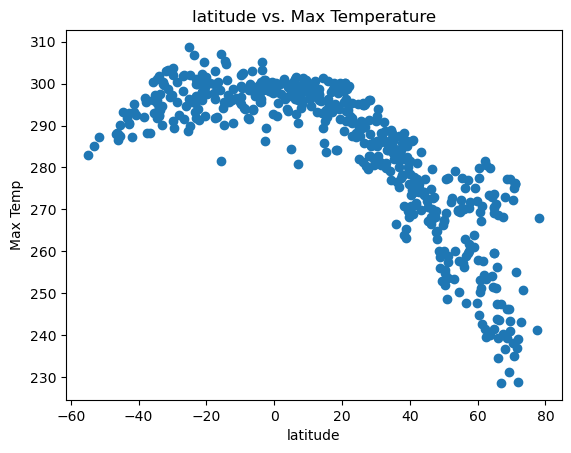

In [50]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"])
plt.xlabel("latitude")
plt.ylabel("Max Temp")
plt.title("latitude vs. Max Temperature")


# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

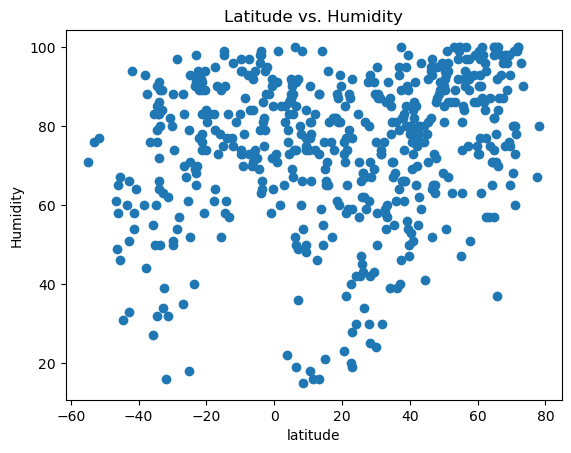

In [51]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"])
plt.xlabel("latitude")
plt.ylabel("Humidity")
plt.title("Latitude vs. Humidity")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

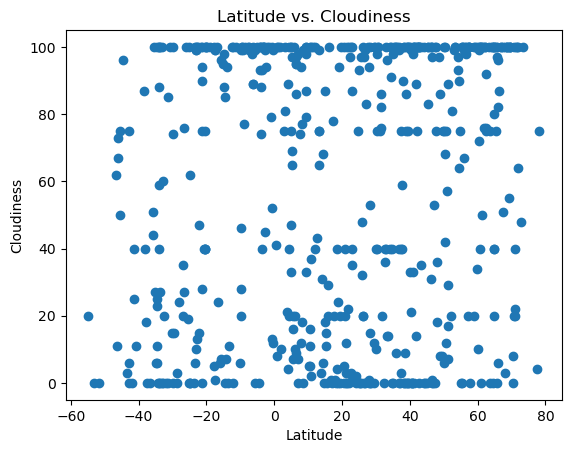

In [52]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Latitude vs. Cloudiness")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

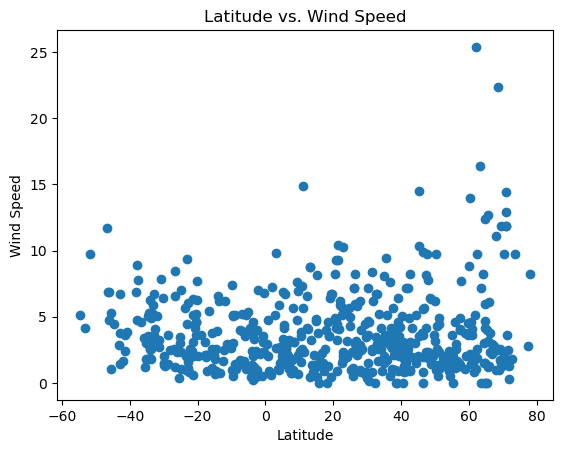

In [53]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"])
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Latitude vs. Wind Speed")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [ ]:
# Define a function to create Linear Regression plots
# def Lin_Graph("x_value"):
    
#     y_value = city_data_df[""]

#     (slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
#     regress_values = x_value * slope + intercept
#     line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#     plt.scatter(x_value,y_value)
#     plt.plot(x_value,regress_values,"r-")
#     plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# plt.show()

In [54]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-cartier,50.0334,-66.8654,267.21,85,100,3.14,CA,2023-02-08 01:45:35
1,tuktoyaktuk,69.4541,-133.0374,241.15,75,100,1.54,CA,2023-02-08 01:41:01
4,klaksvik,62.2266,-6.5890,281.66,84,100,25.39,FO,2023-02-08 01:43:55
5,lavrentiya,65.5833,-171.0000,247.43,92,97,1.24,RU,2023-02-08 01:45:48
7,saint anthony,45.0205,-93.2180,272.03,78,0,2.06,US,2023-02-08 01:45:51


In [55]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,atuona,-9.8000,-139.0333,299.42,74,28,7.37,PF,2023-02-08 01:45:44
3,avarua,-21.2078,-159.7750,302.18,74,28,5.14,CK,2023-02-08 01:45:44
6,braganca paulista,-22.9400,-46.5556,291.74,98,99,1.56,BR,2023-02-08 01:45:50
13,sechura,-5.5569,-80.8222,297.97,74,99,5.14,PE,2023-02-08 01:42:58
15,kaitangata,-46.2817,169.8464,288.10,49,11,6.88,NZ,2023-02-08 01:45:54


###  Temperature vs. Latitude Linear Regression Plot

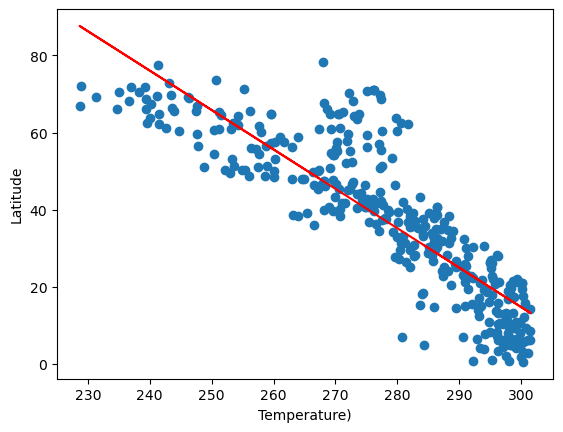

In [57]:
# Linear regression on Northern Hemisphere
x_value = northern_hemi_df["Max Temp"]
y_value = northern_hemi_df["Lat"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_value,y_value)
plt.plot(x_value,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Temperature)')
plt.ylabel('Latitude')
plt.show()

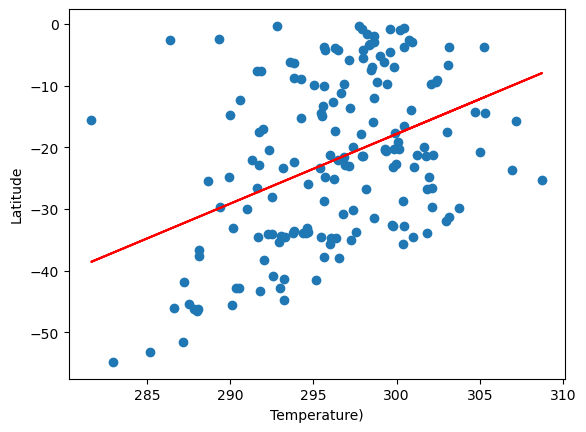

In [58]:
# Linear regression on Southern Hemisphere
x_value = southern_hemi_df["Max Temp"]
y_value = southern_hemi_df["Lat"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_value,y_value)
plt.plot(x_value,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Temperature)')
plt.ylabel('Latitude')
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

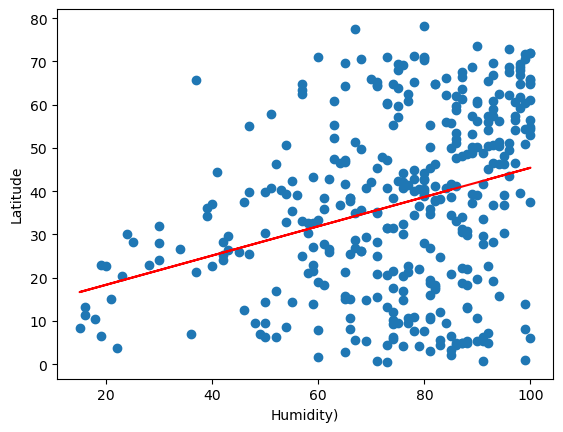

In [59]:
# Northern Hemisphere
x_value = northern_hemi_df["Humidity"]
y_value = northern_hemi_df["Lat"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_value,y_value)
plt.plot(x_value,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Humidity)')
plt.ylabel('Latitude')
plt.show()

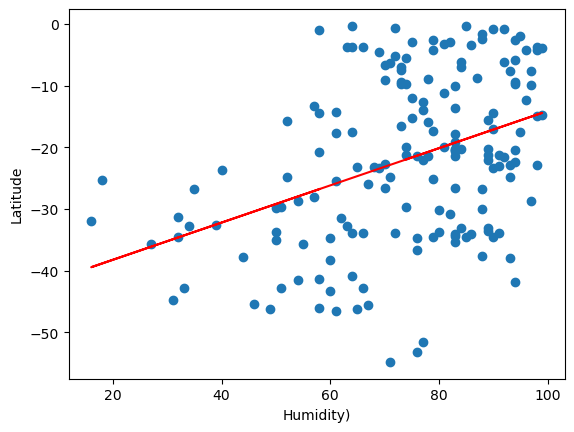

In [60]:
# Southern Hemisphere
x_value = southern_hemi_df["Humidity"]
y_value = southern_hemi_df["Lat"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_value,y_value)
plt.plot(x_value,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Humidity)')
plt.ylabel('Latitude')
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

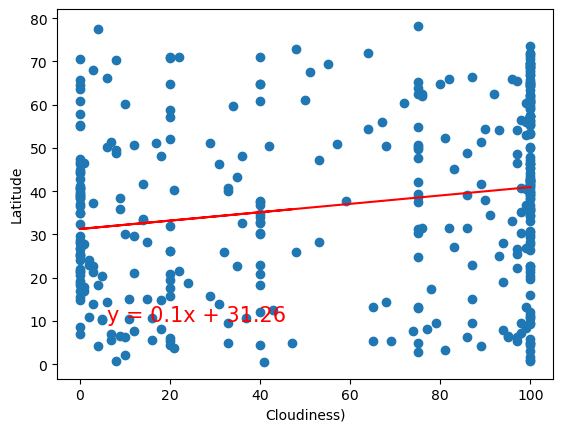

In [61]:
# Northern Hemisphere
x_value = northern_hemi_df["Cloudiness"]
y_value = northern_hemi_df["Lat"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_value,y_value)
plt.plot(x_value,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Cloudiness)')
plt.ylabel('Latitude')
plt.show()

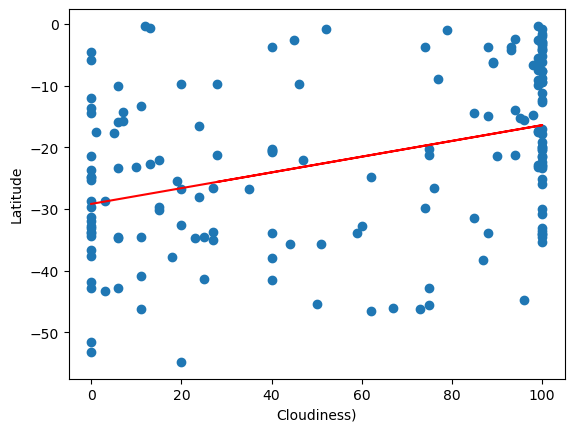

In [62]:
# Southern Hemisphere
x_value = southern_hemi_df["Cloudiness"]
y_value = southern_hemi_df["Lat"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_value,y_value)
plt.plot(x_value,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Cloudiness)')
plt.ylabel('Latitude')
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

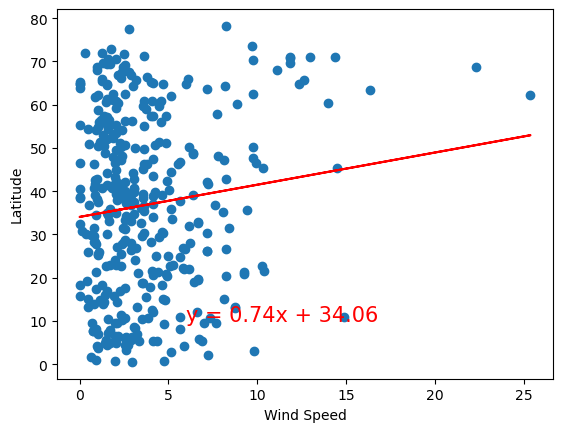

In [63]:
# Northern Hemisphere
x_value = northern_hemi_df["Wind Speed"]
y_value = northern_hemi_df["Lat"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_value,y_value)
plt.plot(x_value,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Wind Speed')
plt.ylabel('Latitude')
plt.show()

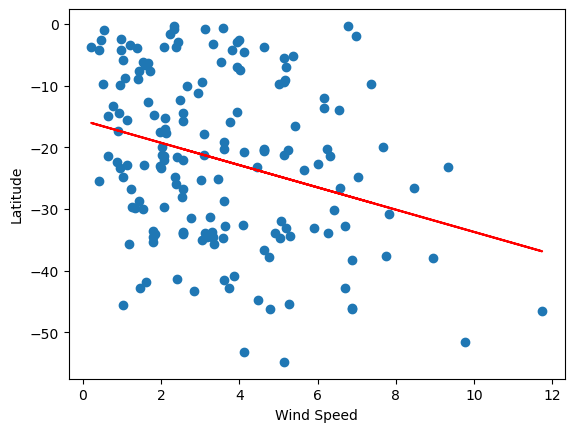

In [64]:
# Southern Hemisphere
x_value = southern_hemi_df["Wind Speed"]
y_value = southern_hemi_df["Lat"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_value,y_value)
plt.plot(x_value,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Wind Speed')
plt.ylabel('Latitude')
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE